In [1]:
import numpy as np
data = np.loadtxt('ex1data2.txt', delimiter=',')
X = data[:,:2]
y = data[:,2]
m = y.size
y = y.reshape(m,1); X = X.reshape(m,2)

In [3]:
import computeCostMulti
import gradientDescent

In [4]:
iterations = 1500
alpha = .1

In [5]:
theta = np.zeros(3).reshape(3,1)

In [6]:
import featureNormalize

In [7]:
import importlib
importlib.reload(featureNormalize)
X_norm, u, sigma = featureNormalize.featureNormalize(X)
X_norm = np.append(np.ones(m).reshape(m,1), X_norm, axis=1)
X = np.append(np.ones(m).reshape(m,1), X, axis=1)

In [8]:
computeCostMulti.costFunctionJ(X_norm, y, theta)

array([[  6.55915481e+10]])

In [18]:
theta

array([[  2.11875886e-08],
       [  1.54242870e+05],
       [ -1.30850606e+05]])

In [10]:
theta, hstry = gradientDescent.gradientDescent(X_norm, y, theta, alpha, iterations)

In [13]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm

/opt/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:280: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [575]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X[:,1], X[:,2], pre, cmap=cm.jet)
#ax.plot(X[:,1], X[:,2], pre, label='z')
plt.xlabel('§0')
plt.ylabel('§1')
plt.show()

NameError: name 'pre' is not defined

In [271]:
cplot = plt.contour((X[:,1], X[:,2], pre, levels=np.geomspace(pre.min()*1.0001, pre.max(), num=8))
plt.clabel(cplot)
plt.xlabel('§0')
plt.ylabel('§1')

SyntaxError: invalid syntax (<ipython-input-271-95779b15ba75>, line 1)

In [11]:
i=0
J_cost = np.zeros(5*iterations).reshape(5,iterations)
for alpha in np.geomspace(.001, 1, num=4):
    theta = np.zeros(3).reshape(3,1)
    theta, J_cost[i] = gradientDescent.gradientDescent(X_norm, y, theta, alpha, iterations)
    i+=1 
alpha = 2
theta = np.zeros(3).reshape(3,1)
theta, J_cost[i] = gradientDescent.gradientDescent(X_norm, y, theta, alpha, iterations)

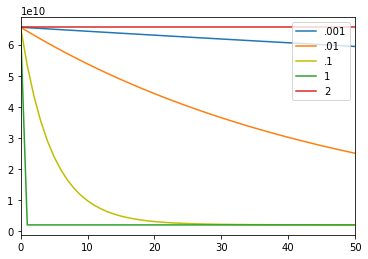

In [14]:
x_vals = range(iterations)
costG1 = plt.plot(x_vals, J_cost[0], label='.001')
costG2 = plt.plot(J_cost[1], label='.01')
costG3 = plt.plot(J_cost[2], label='.1', color='y')
costG4 = plt.plot(J_cost[3], label='1')
costG5 = plt.plot(J_cost[4], label='2')
plt.legend(loc=1)
plt.xlim(xmax=50, xmin=0)
plt.show()

In [15]:
print('Prediction')
X_pred = np.array([1650, 3]).reshape(1,2)
X_pred = np.append(np.ones(1).reshape(1,1), (X_pred - u) / sigma)
print('The price of 1650 sq-ft 3 br house is about $%.2f' %X_pred.dot(theta))
print('Comparison to test set:')
y[np.where((X[:,1] > .95*1650) & (X[:,1] < 1.05*1650))]

Prediction
The price of 1650 sq-ft 3 br house is about $-39214.63
Comparison to test set:


array([[ 329900.],
       [ 242900.],
       [ 368500.]])

In [16]:
import normalEqn
importlib.reload(normalEqn)
theta_nEqn = normalEqn.normalEqn(X, y)

In [17]:
print('Prediction with normal equation')
X_pred_nEqn = np.array([1, 1650, 3]).reshape(1,3)
X_pred_nEqn.dot(theta_nEqn)
print('The price of 1650 sq-ft 3 br house is about $%.2f' %X_pred_nEqn.dot(theta_nEqn))
print('Comparison to test set:')
y[np.where((X[:,1] > .95*1650) & (X[:,1] < 1.05*1650))]

Prediction with normal equation
The price of 1650 sq-ft 3 br house is about $293081.46
Comparison to test set:


array([[ 329900.],
       [ 242900.],
       [ 368500.]])